In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('cardekho_data.csv')

In [6]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
df.duplicated().sum()

2

In [8]:
df = df.drop_duplicates()

In [9]:
num_col = ['Year','Selling_Price','Present_Price','Kms_Driven','Owner']

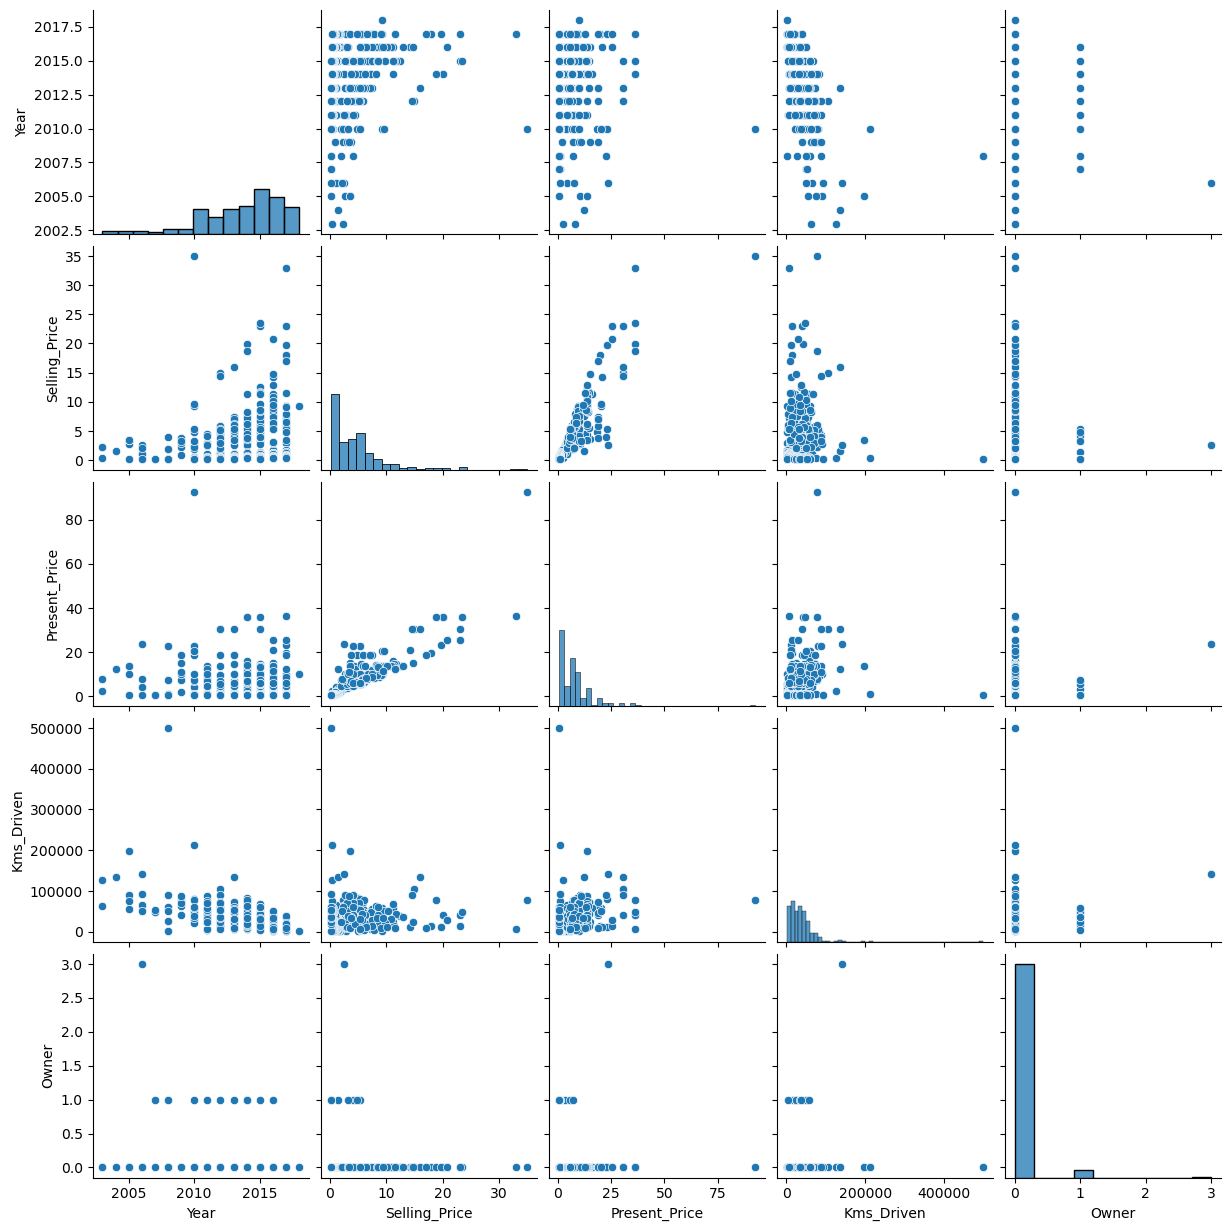

In [10]:
sns.pairplot(df[num_col])

<Axes: >

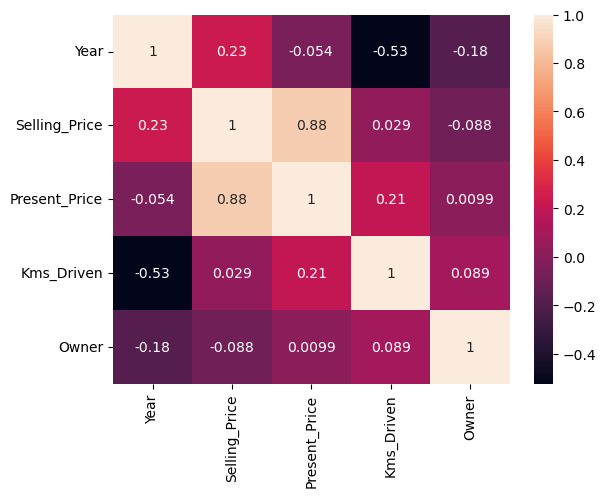

In [11]:
sns.heatmap(df[num_col].corr(),annot=True)

In [12]:
cat_col = ['Fuel_Type','Seller_Type','Transmission']

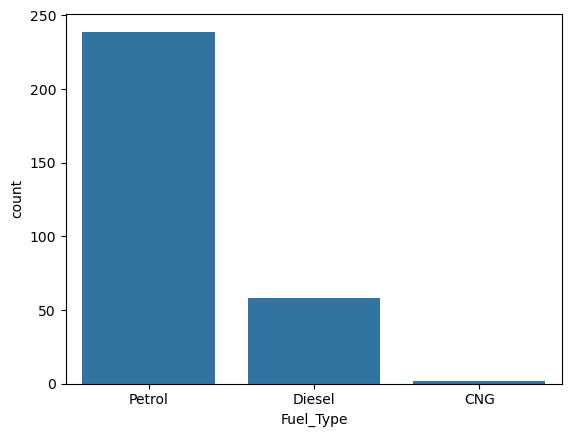

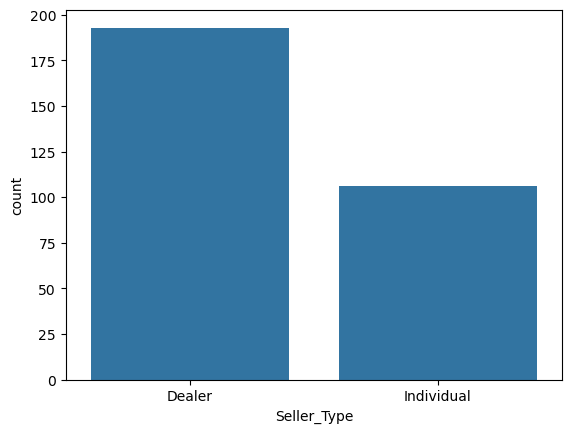

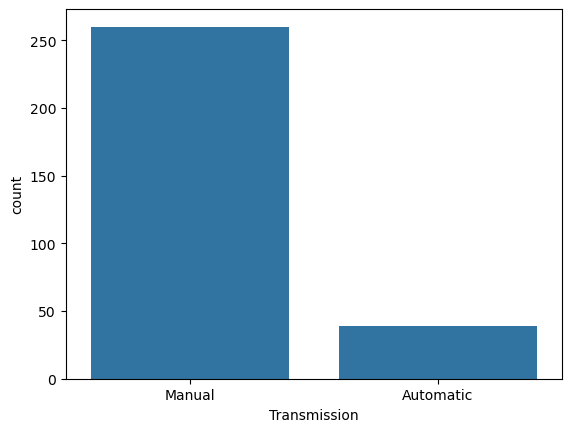

In [13]:
for i in  cat_col:
    sns.countplot(x=i,data=df)
    plt.show()

In [14]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
label = LabelEncoder()

In [17]:
for i in df.select_dtypes(include=['object']).columns:
    df[i]  = label.fit_transform(df[i])

In [19]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,69,2016,9.50,11.60,33988,1,0,1,0
297,66,2015,4.00,5.90,60000,2,0,1,0
298,69,2009,3.35,11.00,87934,2,0,1,0
299,69,2017,11.50,12.50,9000,1,0,1,0


In [31]:
X = df.drop('Selling_Price',axis=1)
y = df['Selling_Price']

In [32]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [34]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)

In [35]:
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [36]:
y_pred = model.predict(X_test)

In [37]:
from sklearn.metrics import r2_score

In [38]:
r2_score(y_test,y_pred)

0.5666885062430761

In [39]:
param = {
    "n_estimators" : [100,200,300,400,500],
    "max_depth" : [None,5,10,15,20],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,2,4]
}

In [40]:
random = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param,
    n_iter=20,
    cv=3,
    n_jobs=-1,
    verbose=1,
    random_state=42
)
random

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 15, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, verbose=1)

In [41]:
random.fit(X_train,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 15, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, verbose=1)

In [42]:
random.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': None}

In [43]:
estimators = random.best_estimator_

In [44]:
y_best = estimators.predict(X_test)

In [45]:
r2_score(y_test,y_best)

0.632985991421339

In [46]:
r2_score(y_test,y_pred)

0.5666885062430761

In [47]:

import joblib

joblib.dump(model, "model1.pkl")

['model1.pkl']